<a href="https://www.kaggle.com/code/heshamibrahem/2021-2022-premier-league?scriptVersionId=105987018" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league-match-data/soccer21-22.csv


In [2]:
df = pd.read_csv("/kaggle/input/premier-league-match-data/soccer21-22.csv")

In [3]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [4]:
df[df.duplicated()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


In [5]:
df.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [6]:
df.HomeTeam.unique()

array(['Brentford', 'Man United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester', 'Watford', 'Norwich', 'Newcastle', 'Tottenham',
       'Liverpool', 'Aston Villa', 'Crystal Palace', 'Leeds', 'Man City',
       'Brighton', 'Southampton', 'Wolves', 'Arsenal', 'West Ham'],
      dtype=object)

In [7]:
df.AwayTeam.unique()

array(['Arsenal', 'Leeds', 'Brighton', 'Crystal Palace', 'Southampton',
       'Wolves', 'Aston Villa', 'Liverpool', 'West Ham', 'Man City',
       'Burnley', 'Newcastle', 'Brentford', 'Everton', 'Norwich',
       'Watford', 'Man United', 'Tottenham', 'Chelsea', 'Leicester'],
      dtype=object)

In [8]:
df.shape

(380, 22)

In [9]:
no_of_teams = 20
home_and_away = 2
no_of_matches_per_week = no_of_teams/2
number_of_matches = home_and_away*(no_of_teams-1)*no_of_matches_per_week
number_of_matches == df.shape[0]

True

In [10]:
df.HomeTeam.value_counts()

Brentford         19
Man United        19
Arsenal           19
Wolves            19
Southampton       19
Brighton          19
Man City          19
Leeds             19
Crystal Palace    19
Aston Villa       19
Liverpool         19
Tottenham         19
Newcastle         19
Norwich           19
Watford           19
Leicester         19
Everton           19
Chelsea           19
Burnley           19
West Ham          19
Name: HomeTeam, dtype: int64

In [11]:
df.AwayTeam.value_counts()

Arsenal           19
Leeds             19
Chelsea           19
Tottenham         19
Man United        19
Watford           19
Norwich           19
Everton           19
Brentford         19
Newcastle         19
Burnley           19
Man City          19
West Ham          19
Liverpool         19
Aston Villa       19
Wolves            19
Southampton       19
Crystal Palace    19
Brighton          19
Leicester         19
Name: AwayTeam, dtype: int64

**No need to clean the data**

**1- What's the league table?**

In [12]:
table = pd.DataFrame(list(df.HomeTeam.unique()),columns = ['Team'])
table

,Team
0,Brentford
1,Man United
2,Burnley
3,Chelsea
4,Everton
5,Leicester
6,Watford
7,Norwich
8,Newcastle
9,Tottenham


In [13]:
table[['Played','Win','Draw','Loss','GF','GA','GD','Points']] = 0

In [14]:
table

,Team,Played,Win,Draw,Loss,GF,GA,GD,Points
0,Brentford,0,0,0,0,0,0,0,0
1,Man United,0,0,0,0,0,0,0,0
2,Burnley,0,0,0,0,0,0,0,0
3,Chelsea,0,0,0,0,0,0,0,0
4,Everton,0,0,0,0,0,0,0,0
5,Leicester,0,0,0,0,0,0,0,0
6,Watford,0,0,0,0,0,0,0,0
7,Norwich,0,0,0,0,0,0,0,0
8,Newcastle,0,0,0,0,0,0,0,0
9,Tottenham,0,0,0,0,0,0,0,0


In [15]:
table = table.set_index('Team')

In [16]:
for i in df.index:
    home = df.HomeTeam.loc[i]
    away = df.AwayTeam.loc[i]
    table.loc[home,'Played'] += 1
    table.loc[away,'Played'] += 1
    table.loc[home,'GF'] += df.FTHG.loc[i]
    table.loc[away,'GF'] += df.FTAG.loc[i]
    table.loc[home,'GA'] += df.FTAG.loc[i]
    table.loc[away,'GA'] += df.FTHG.loc[i]
    if df.loc[i,'FTR'] == "H":
        table.loc[home,'Win'] += 1
        table.loc[away,'Loss'] += 1
    elif df.loc[i,'FTR'] == "A":
        table.loc[away,'Win'] += 1
        table.loc[home,'Loss'] += 1
    else:
        table.loc[away,'Draw'] += 1
        table.loc[home,'Draw'] += 1
table['Points'] = 3*table['Win'] + table['Draw']
table['GD'] = table['GF'] - table['GA']

In [17]:
table = table.sort_values(by='Points', ascending=False)
table = table.reset_index()

In [18]:
table

,Team,Played,Win,Draw,Loss,GF,GA,GD,Points
0,Man City,38,29,6,3,99,26,73,93
1,Liverpool,38,28,8,2,94,26,68,92
2,Chelsea,38,21,11,6,76,33,43,74
3,Tottenham,38,22,5,11,69,40,29,71
4,Arsenal,38,22,3,13,61,48,13,69
5,Man United,38,16,10,12,57,57,0,58
6,West Ham,38,16,8,14,60,51,9,56
7,Leicester,38,14,10,14,62,59,3,52
8,Brighton,38,12,15,11,42,44,-2,51
9,Wolves,38,15,6,17,38,43,-5,51


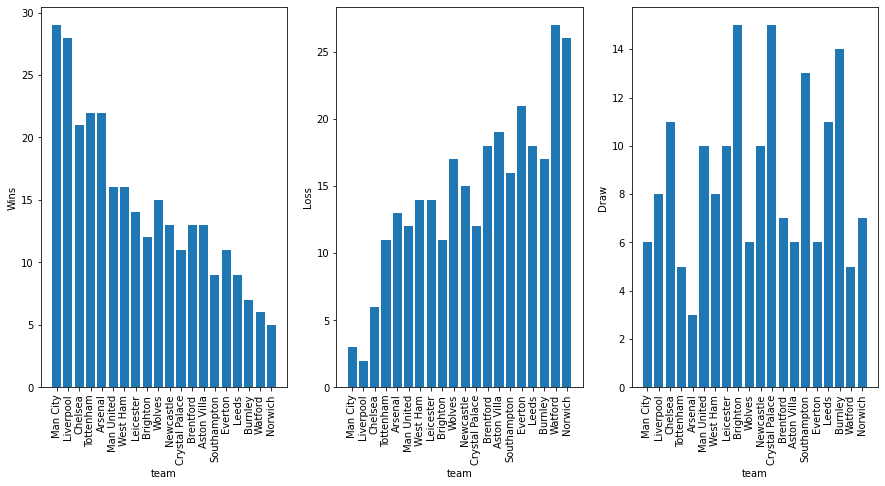

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.bar(table.Team, table.Win)
plt.xlabel('team')
plt.ylabel('Wins')
plt.xticks(rotation='vertical')
plt.subplot(132)
plt.bar(table.Team, table.Loss)
plt.xlabel('team')
plt.ylabel('Loss')
plt.xticks(rotation='vertical')
plt.subplot(133)
plt.bar(table.Team, table.Draw)
plt.xlabel('team')
plt.ylabel('Draw')
plt.xticks(rotation='vertical')
plt.show()

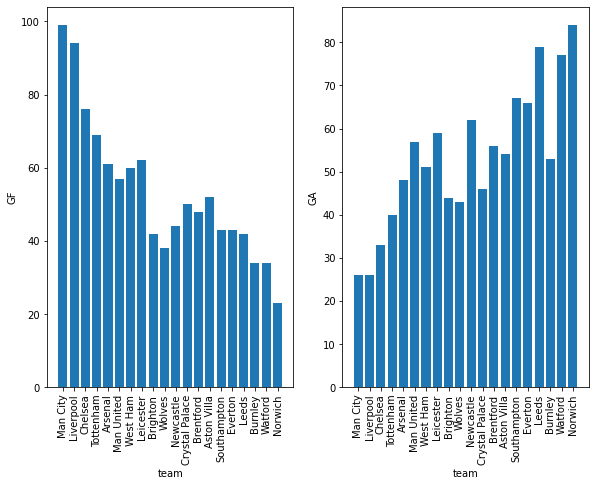

In [20]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.bar(table.Team, table.GF)
plt.xlabel('team')
plt.ylabel('GF')
plt.xticks(rotation='vertical')
plt.subplot(132)
plt.bar(table.Team, table.GA)
plt.xlabel('team')
plt.ylabel('GA')
plt.xticks(rotation='vertical')
plt.show()

**What about goals for each team?**

**1- Man City**

In [21]:
home = df[df.HomeTeam == 'Man City'][['HomeTeam','FTHG','FTAG','HTHG','HTAG']]
away = df[df.AwayTeam == 'Man City'][['AwayTeam','FTHG','FTAG','HTHG','HTAG']]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


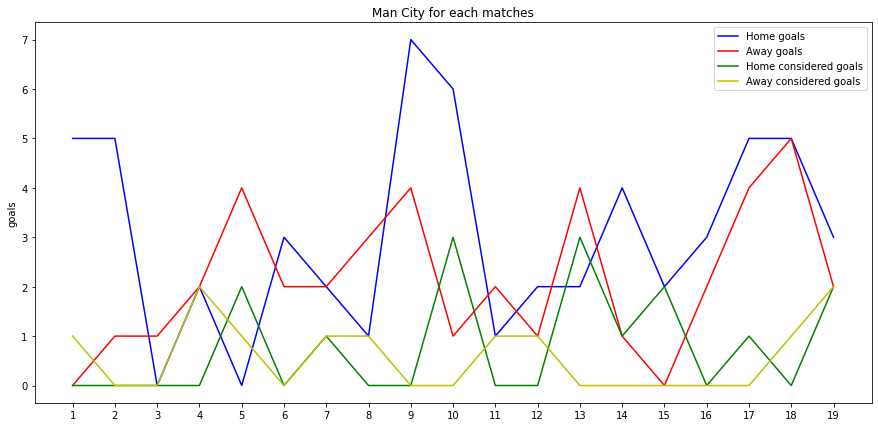

In [22]:
X = list(range(1,len(home)+1))
print(X)
y = home['FTHG']
z = away['FTAG']
ya = home['FTAG']
za = away['FTHG']
plt.figure(figsize=(15, 7))
plt.plot(X, y, color='b', label='Home goals')
plt.plot(X, z, color='r', label='Away goals')
plt.plot(X, ya, color='g', label='Home considered goals')
plt.plot(X, za, color='y', label='Away considered goals')
plt.ylabel("goals")
plt.title("Man City for each matches")
plt.xticks(range(1,len(home)+1))
plt.legend()
plt.show()

**The figure shows why Man City won the title:
1- They scored +3 goals in most of their home matches
2- They tried and scored in most of their away matches
3- They took advantage of the crowd factor in their home matches and scored a lot, on the other hand, they considered very few goals except in some matches
4- Their forwards are good however the defenders need to be improved**

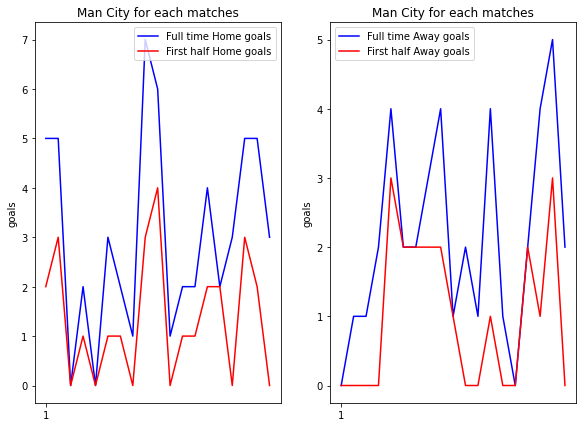

In [23]:
X = list(range(1,len(home)+1))
yy = home['HTHG']
zz = away['HTAG']
yya = home['HTAG']
zya = away['HTHG']
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(X, y, color='b', label='Full time Home goals')
plt.plot(X, yy, color='r', label='First half Home goals')
plt.ylabel("goals")
plt.title("Man City for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.subplot(132)
plt.plot(X, z, color='b', label='Full time Away goals')
plt.plot(X, zz, color='r', label='First half Away goals')
plt.ylabel("goals")
plt.title("Man City for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.show()

**Another reason is that they are not satisfied with their goals in the first half**

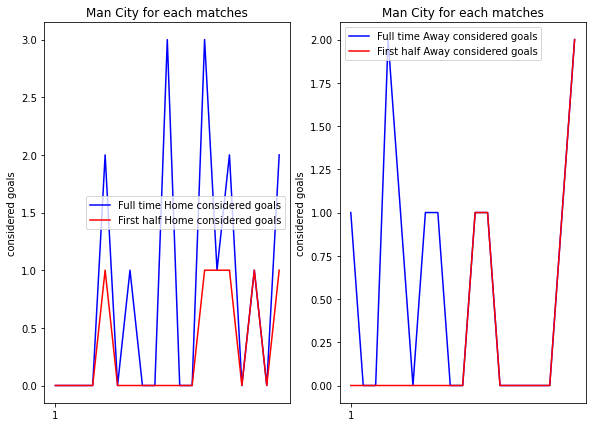

In [24]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(X, ya, color='b', label='Full time Home considered goals')
plt.plot(X, yya, color='r', label='First half Home considered goals')
plt.ylabel("considered goals")
plt.title("Man City for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.subplot(132)
plt.plot(X, za, color='b', label='Full time Away considered goals')
plt.plot(X, zya, color='r', label='First half Away considered goals')
plt.ylabel("considered goals")
plt.title("Man City for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.show()

**The defenders are not improving at half-time. It may seem that they have improved in the other half of the season in their away matches, but this does not mean that they were a greater reason than the strikers to win the league.**

**ًًWhat about comebacks?**

In [25]:
home_manc = df[df.HomeTeam == 'Man City'][['HomeTeam','FTR','HTR']]
away_manc = df[df.AwayTeam == 'Man City'][['AwayTeam','FTR','HTR']]

In [26]:
home_comebacks = home_manc[(home_manc.HTR == 'A') & (home_manc.FTR == 'H')]
away_comebacks = away_manc[(away_manc.HTR == 'H') & (away_manc.FTR == 'A')]

In [27]:
len(home_comebacks) + len(away_comebacks)

2

**Man City made 2 comebacks in the season**

In [28]:
home_comebacks_cons = home_manc[(home_manc.HTR == 'H') & (home_manc.FTR == 'A')]
away_comebacks_cons = away_manc[(away_manc.HTR == 'A') & (away_manc.FTR == 'H')]

In [29]:
len(home_comebacks_cons) + len(away_comebacks_cons)

0

**On the other hand no team made comeback on Man City**

**2- Liverpool**

In [30]:
home = df[df.HomeTeam == 'Liverpool'][['HomeTeam','FTHG','FTAG','HTHG','HTAG']]
away = df[df.AwayTeam == 'Liverpool'][['AwayTeam','FTHG','FTAG','HTHG','HTAG']]

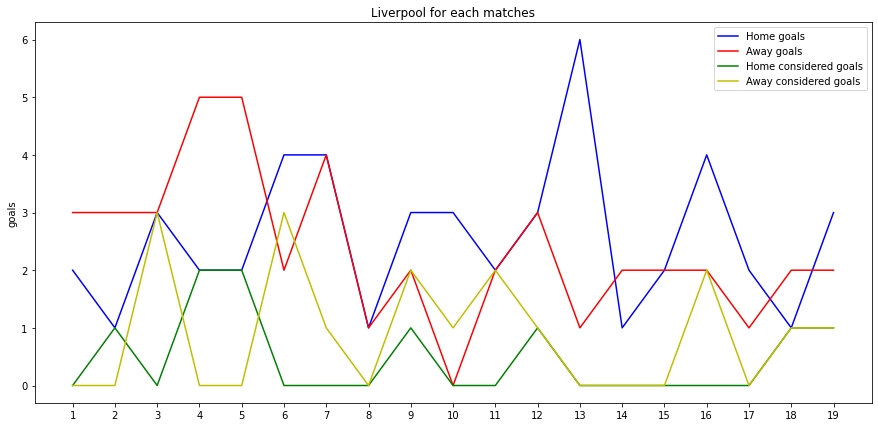

In [31]:
X = list(range(1,len(home)+1))
y = home['FTHG']
z = away['FTAG']
ya = home['FTAG']
za = away['FTHG']
plt.figure(figsize=(15, 7))
plt.plot(X, y, color='b', label='Home goals')
plt.plot(X, z, color='r', label='Away goals')
plt.plot(X, ya, color='g', label='Home considered goals')
plt.plot(X, za, color='y', label='Away considered goals')
plt.ylabel("goals")
plt.title("Liverpool for each matches")
plt.xticks(range(1,len(home)+1))
plt.legend()
plt.show()

**Despite their positive results in their matches inside their stadium, they achieved some negative results in their matches outside the stadium, which had a factor in their occupation of second place instead of the first.**

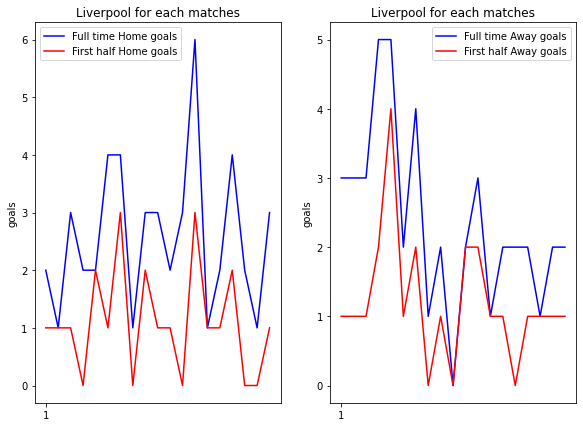

In [32]:
yy = home['HTHG']
zz = away['HTAG']
yya = home['HTAG']
zya = away['HTHG']
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(X, y, color='b', label='Full time Home goals')
plt.plot(X, yy, color='r', label='First half Home goals')
plt.ylabel("goals")
plt.title("Liverpool for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.subplot(132)
plt.plot(X, z, color='b', label='Full time Away goals')
plt.plot(X, zz, color='r', label='First half Away goals')
plt.ylabel("goals")
plt.title("Liverpool for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.show()

**Like Manchester City, they are not satisfied with the result of the first half, but in a few matches they are satisfied**

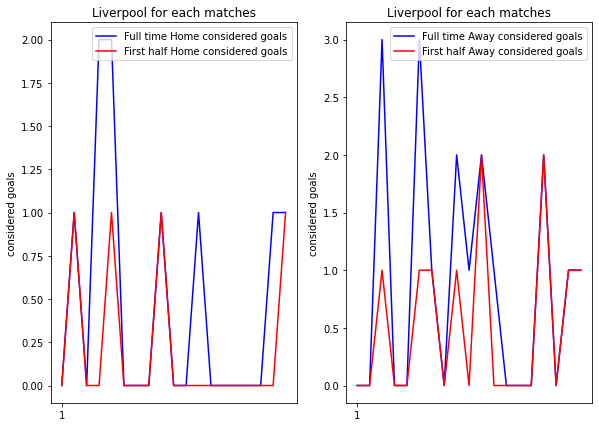

In [33]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(X, ya, color='b', label='Full time Home considered goals')
plt.plot(X, yya, color='r', label='First half Home considered goals')
plt.ylabel("considered goals")
plt.title("Liverpool for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.subplot(132)
plt.plot(X, za, color='b', label='Full time Away considered goals')
plt.plot(X, zya, color='r', label='First half Away considered goals')
plt.ylabel("considered goals")
plt.title("Liverpool for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.show()

**Unlike Manchester, they have defense and tactics by which they know the opponent in the first half and prevent them from scoring in the second half in most matches**

**ًًWhat about comebacks?**

In [34]:
home_liv = df[df.HomeTeam == 'Liverpool'][['HomeTeam','FTR','HTR']]
away_liv = df[df.AwayTeam == 'Liverpool'][['AwayTeam','FTR','HTR']]

In [35]:
home_comebacks = home_liv[(home_liv.HTR == 'A') & (home_liv.FTR == 'H')]
away_comebacks = away_liv[(away_liv.HTR == 'H') & (away_liv.FTR == 'A')]

In [36]:
len(home_comebacks)+len(away_comebacks)

0

In [37]:
home_comebacks_conc = home_liv[(home_liv.HTR == 'H') & (home_liv.FTR == 'A')]
away_comebacks_conc = away_liv[(away_liv.HTR == 'A') & (away_liv.FTR == 'H')]

In [38]:
len(home_comebacks_conc)+len(away_comebacks_conc)

0

**No comeback happened in thier matches**

**3- Norwich**

In [39]:
home = df[df.HomeTeam == 'Norwich'][['HomeTeam','FTHG','FTAG','HTHG','HTAG']]
away = df[df.AwayTeam == 'Norwich'][['AwayTeam','FTHG','FTAG','HTHG','HTAG']]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


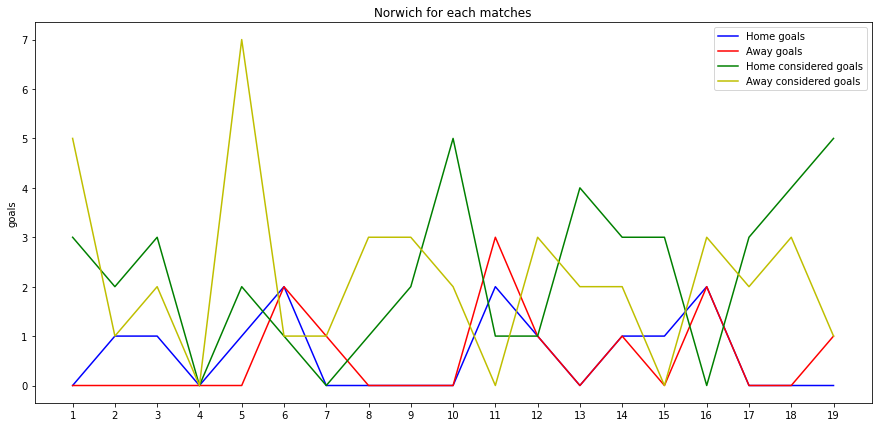

In [40]:
X = list(range(1,len(home)+1))
print(X)
y = home['FTHG']
z = away['FTAG']
ya = home['FTAG']
za = away['FTHG']
plt.figure(figsize=(15, 7))
plt.plot(X, y, color='b', label='Home goals')
plt.plot(X, z, color='r', label='Away goals')
plt.plot(X, ya, color='g', label='Home considered goals')
plt.plot(X, za, color='y', label='Away considered goals')
plt.ylabel("goals")
plt.title("Norwich for each matches")
plt.xticks(range(1,len(home)+1))
plt.legend()
plt.show()

**One of the reasons that they are in the last place in the league is the worst defender especially in Away matches and the worst forwards that scored few goals and in most of the matches they don't score**

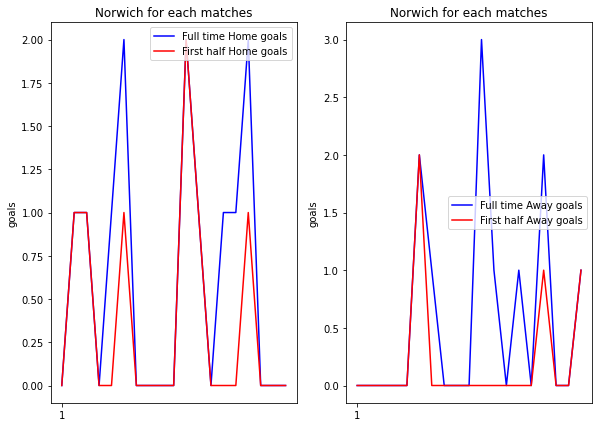

In [41]:
yy = home['HTHG']
zz = away['HTAG']
yya = home['HTAG']
zya = away['HTHG']
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(X, y, color='b', label='Full time Home goals')
plt.plot(X, yy, color='r', label='First half Home goals')
plt.ylabel("goals")
plt.title("Norwich for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.subplot(132)
plt.plot(X, z, color='b', label='Full time Away goals')
plt.plot(X, zz, color='r', label='First half Away goals')
plt.ylabel("goals")
plt.title("Norwich for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.show()

**In most matches they don't score in the first and second half of the match but when they score they prefer the second half of the match to score and if they scored in the first half they sometimes stop scoring**

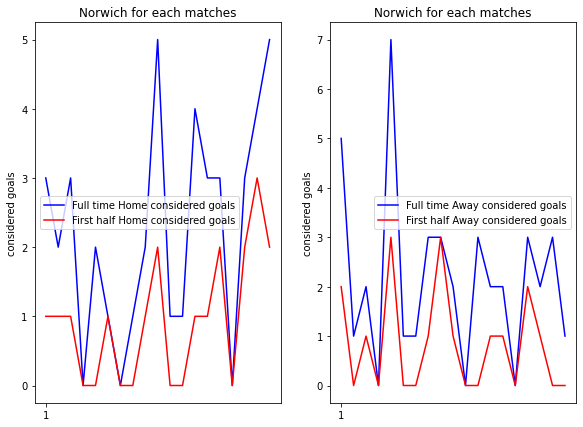

In [42]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(X, ya, color='b', label='Full time Home considered goals')
plt.plot(X, yya, color='r', label='First half Home considered goals')
plt.ylabel("considered goals")
plt.title("Norwich for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.subplot(132)
plt.plot(X, za, color='b', label='Full time Away considered goals')
plt.plot(X, zya, color='r', label='First half Away considered goals')
plt.ylabel("considered goals")
plt.title("Norwich for each matches")
plt.xticks(range(1,4,len(home)+1))
plt.legend()
plt.show()

**The defenders can't stop or know their opponent tactics in the rest so their opponents score more goals in the second half of the match**

In [43]:
table[['shots','shots_on_targets','shots_a','shots_on_targets_a']] = 0

In [44]:
table = table.set_index('Team')
for i in df.index:
    home = df.HomeTeam.loc[i]
    away = df.AwayTeam.loc[i]
    table.loc[home,'shots'] += df.HS.loc[i]
    table.loc[home,'shots_on_targets'] += df.HST.loc[i]
    table.loc[away,'shots'] += df.AS.loc[i]
    table.loc[away,'shots_on_targets'] += df.AST.loc[i]
    table.loc[home,'shots_a'] += df.AS.loc[i]
    table.loc[home,'shots_on_targets_a'] += df.AST.loc[i]
    table.loc[away,'shots_a'] += df.HS.loc[i]
    table.loc[away,'shots_on_targets_a'] += df.HST.loc[i]
table = table.reset_index()

In [45]:
table

,Team,Played,Win,Draw,Loss,GF,GA,GD,Points,shots,shots_on_targets,shots_a,shots_on_targets_a
0,Man City,38,29,6,3,99,26,73,93,715,254,237,88
1,Liverpool,38,28,8,2,94,26,68,92,730,256,296,110
2,Chelsea,38,21,11,6,76,33,43,74,592,211,341,119
3,Tottenham,38,22,5,11,69,40,29,71,491,198,481,141
4,Arsenal,38,22,3,13,61,48,13,69,588,197,425,147
5,Man United,38,16,10,12,57,57,0,58,508,187,511,183
6,West Ham,38,16,8,14,60,51,9,56,433,158,548,167
7,Leicester,38,14,10,14,62,59,3,52,435,169,558,197
8,Brighton,38,12,15,11,42,44,-2,51,490,152,476,152
9,Wolves,38,15,6,17,38,43,-5,51,402,136,511,171


In [46]:
table['target_rate'] = table['shots_on_targets']/table['shots']*100
table['target_a_rate'] = table['shots_on_targets_a']/table['shots_a']*100
table['GK_goal_per_shots'] = table['GA']/table['shots_on_targets_a']*100

In [47]:
table

,Team,Played,Win,Draw,Loss,GF,GA,GD,Points,shots,shots_on_targets,shots_a,shots_on_targets_a,target_rate,target_a_rate,GK_goal_per_shots
0,Man City,38,29,6,3,99,26,73,93,715,254,237,88,35.524476,37.130802,29.545455
1,Liverpool,38,28,8,2,94,26,68,92,730,256,296,110,35.068493,37.162162,23.636364
2,Chelsea,38,21,11,6,76,33,43,74,592,211,341,119,35.641892,34.897361,27.731092
3,Tottenham,38,22,5,11,69,40,29,71,491,198,481,141,40.325866,29.313929,28.368794
4,Arsenal,38,22,3,13,61,48,13,69,588,197,425,147,33.503401,34.588235,32.653061
5,Man United,38,16,10,12,57,57,0,58,508,187,511,183,36.811024,35.812133,31.147541
6,West Ham,38,16,8,14,60,51,9,56,433,158,548,167,36.489607,30.474453,30.538922
7,Leicester,38,14,10,14,62,59,3,52,435,169,558,197,38.850575,35.304659,29.949239
8,Brighton,38,12,15,11,42,44,-2,51,490,152,476,152,31.020408,31.932773,28.947368
9,Wolves,38,15,6,17,38,43,-5,51,402,136,511,171,33.830846,33.463796,25.146199


**Norwich is the most random team in thier shots and the least team for shots that's why they are in the last place**

In [48]:
df.Referee.unique()

array(['M Oliver', 'P Tierney', 'D Coote', 'J Moss', 'A Madley',
       'C Pawson', 'M Dean', 'A Marriner', 'M Atkinson', 'A Taylor',
       'D England', 'G Scott', 'S Attwell', 'P Bankes', 'R Jones',
       'K Friend', 'C Kavanagh', 'J Gillett', 'S Hooper', 'M Salisbury',
       'J Brooks', 'T Harrington'], dtype=object)

In [49]:
referee = df.groupby('Referee')['HY','AY','HR','AR'].agg('mean').reset_index()
referee

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Referee,HY,AY,HR,AR
0,A Madley,1.000000,1.250000,0.000000,0.125000
1,A Marriner,1.421053,1.789474,0.105263,0.000000
2,A Taylor,1.785714,1.821429,0.107143,0.071429
3,C Kavanagh,1.666667,2.111111,0.111111,0.055556
4,C Pawson,1.961538,2.153846,0.076923,0.000000
5,D Coote,2.150000,2.350000,0.050000,0.050000
6,D England,1.666667,2.200000,0.000000,0.066667
7,G Scott,1.750000,1.500000,0.000000,0.083333
8,J Brooks,2.750000,2.500000,0.000000,0.000000
9,J Gillett,1.555556,1.888889,0.111111,0.000000


In [50]:
referee['y'] = referee['HY'] + referee['AY']
referee['r'] = referee['HR'] + referee['AR']
referee.drop(['HY','AY','HR','AR'],axis=1,inplace=True)

In [51]:
referee

,Referee,y,r
0,A Madley,2.250000,0.125000
1,A Marriner,3.210526,0.105263
2,A Taylor,3.607143,0.178571
3,C Kavanagh,3.777778,0.166667
4,C Pawson,4.115385,0.076923
5,D Coote,4.500000,0.100000
6,D England,3.866667,0.066667
7,G Scott,3.250000,0.083333
8,J Brooks,5.250000,0.000000
9,J Gillett,3.444444,0.111111


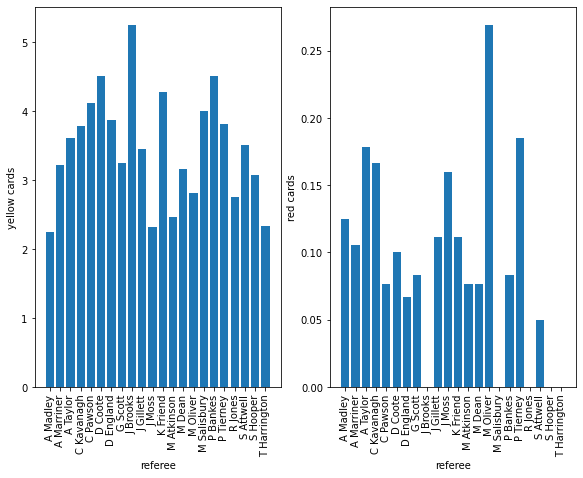

In [52]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.bar(referee.Referee, referee.y)
plt.xlabel('referee')
plt.ylabel('yellow cards')
plt.xticks(rotation='vertical')
plt.subplot(132)
plt.bar(referee.Referee, referee.r)
plt.xlabel('referee')
plt.ylabel('red cards')
plt.xticks(rotation='vertical')
plt.show()

**All referess have the same rate of giving yellew cards but for red cards we have M oliver who has the highest rate on giving red cards so the players should be carful when he become the referee**